In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Tire_useability = pd.read_csv("datasets/Tire_useability.csv")

In [4]:
Tire_useability.head()

,Miles_driven,Percentage_Useable
0,1,98.2
1,2,91.7
2,5,81.3
3,10,64.0
4,20,36.4


Text(0, 0.5, 'Percentage Useable')

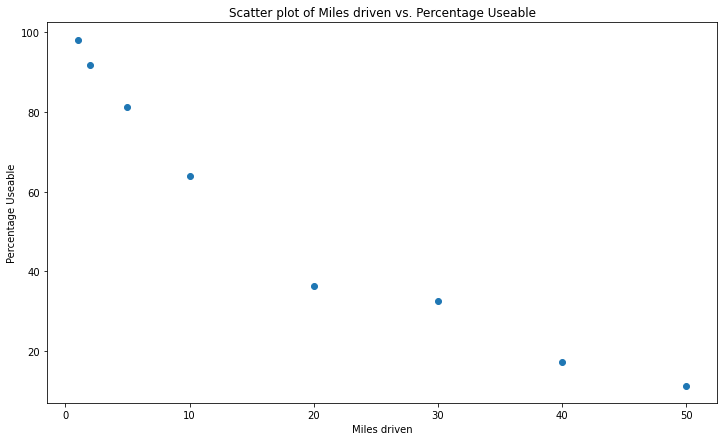

In [5]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable", data = Tire_useability)
plt.title("Scatter plot of Miles driven vs. Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Percentage Useable")

Text(0, 0.5, 'Log of Percentage Useable')

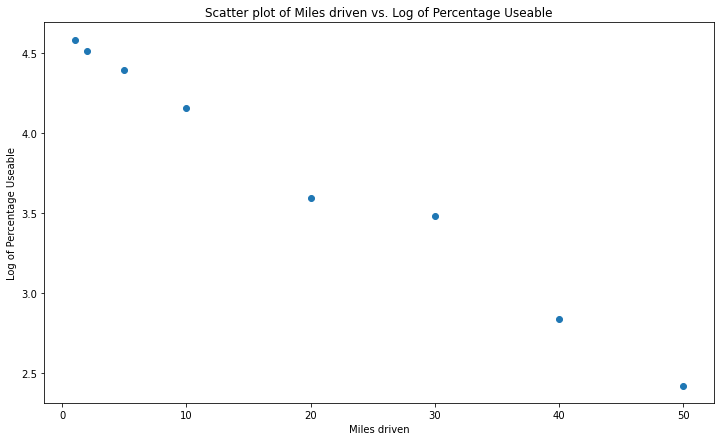

In [6]:
plt.figure(figsize=(12,7))
plt.scatter(x = Tire_useability["Miles_driven"], y = np.log(Tire_useability["Percentage_Useable"]))
plt.title("Scatter plot of Miles driven vs. Log of Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Log of Percentage Useable")

In [7]:
import statsmodels.formula.api as smf
exp_model = smf.ols(formula='np.log(Percentage_Useable) ~ Miles_driven ',
                    data = Tire_useability).fit()

In [8]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.log(Percentage_Useable)   R-squared:                       0.988
Model:                                    OLS   Adj. R-squared:                  0.986
Method:                         Least Squares   F-statistic:                     492.0
Date:                        Tue, 02 Feb 2021   Prob (F-statistic):           5.49e-07
Time:                                08:54:28   Log-Likelihood:                 8.5732
No. Observations:                           8   AIC:                            -13.15
Df Residuals:                               6   BIC:                            -12.99
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6046      0.051     89.850      0.000       4.479       4.730
Miles_driven    -0.0432      0.002    -22.182      0.000      -0.048      -0.038
==============================================================================
Omnibus:                        3.910   Durbin-Watson:                   3.060
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                0.581
Skew:                           0.533   Prob(JB):                        0.748
Kurtosis:                       3.779   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
predictions = exp_model.predict(Tire_useability[["Miles_driven"]])

Text(0, 0.5, 'Percentage Useable')

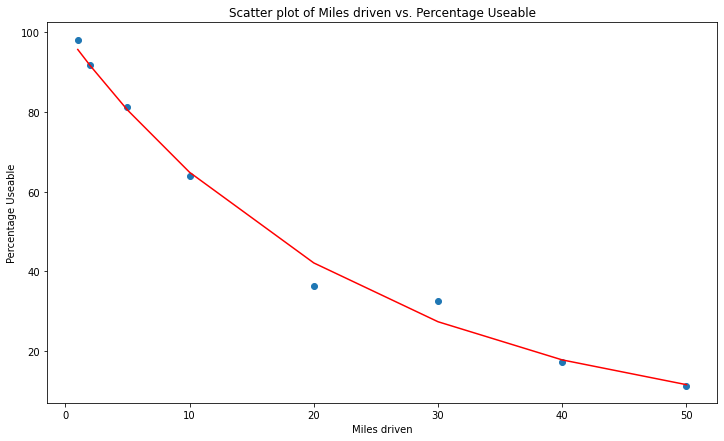

In [11]:
plt.figure(figsize=(12,7))
plt.scatter(x = "Miles_driven", y = "Percentage_Useable",data = Tire_useability)
plt.plot(Tire_useability["Miles_driven"],np.exp(predictions),'r')
plt.title("Scatter plot of Miles driven vs. Percentage Useable")
plt.xlabel("Miles driven")
plt.ylabel("Percentage Useable")